# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [55]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

### Step 3. Assign it to a variable apple and apply a head()

In [3]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type and check the info()

In [56]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [59]:
apple.set_index('Date', inplace= True)

In [8]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [9]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [60]:
apple.sort_index(inplace= True)

In [13]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [17]:
apple_bm = apple.asfreq('BM')
apple_bm

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83


### Step 10.  What is the difference in days between the first day and the oldest

In [18]:
apple.index[0]

Timestamp('1980-12-12 00:00:00')

In [19]:
apple.index[-1]

Timestamp('2014-07-08 00:00:00')

In [20]:
apple.index[-1] - apple.index[0]

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [24]:
apple.index.month.nunique()

12

In [47]:
apple.index.to_period('M').head()

PeriodIndex(['1980-12', '1980-12', '1980-12', '1980-12', '1980-12', '1980-12',
             '1980-12', '1980-12', '1980-12', '1980-12',
             ...
             '2014-06', '2014-06', '2014-06', '2014-06', '2014-06', '2014-07',
             '2014-07', '2014-07', '2014-07', '2014-07'],
            dtype='period[M]', name='Date', length=8465)

In [48]:
apple

,Open,High,Low,Close,Volume,Adj Close,Month,Year
Date,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,12,1980
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,12,1980
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,12,1980
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,12,1980
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,12,1980
...,...,...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,7,2014
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,7,2014
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,7,2014


In [49]:
apple.reset_index('Date', inplace= True)

In [50]:
apple['Month'] = apple['Date'].dt.month
apple['Year'] = apple['Date'].dt.year

In [51]:
apple.groupby(['Year', 'Month']).sum()

C:\Users\misla\AppData\Local\Temp\ipykernel_6576\3110240361.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  apple.groupby(['Year', 'Month']).sum()


Open      High       Low     Close      Volume  Adj Close
Year Month                                                               
1980 12       396.26    397.38    395.76    395.76   336212800       6.15
1981 1        666.85    668.36    664.75    664.75   152247200      10.37
     2        503.12    504.87    501.75    501.75    80404800       7.81
     3        548.63    550.37    546.40    546.40   175179200       8.53
     4        573.02    574.73    571.77    571.77   134232000       8.89
...              ...       ...       ...       ...         ...        ...
2014 3      11205.46  11265.53  11131.49  11197.50  1250424700    1590.75
     4      11341.72  11431.33  11261.51  11362.56  1608765200    1614.21
     5      12627.34  12733.83  12564.99  12667.11  1433917100    1807.23
     6       4669.56   4705.77   4635.45   4675.82  1206556300    1929.60
     7        471.47    475.02    467.44    472.35   210918300     472.35

[404 rows x 6 columns]

In [53]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close,Month,Year
0,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,12,1980
1,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,12,1980
2,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,12,1980
3,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,12,1980
4,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,12,1980
...,...,...,...,...,...,...,...,...,...
8460,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,7,2014
8461,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,7,2014
8462,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,7,2014
8463,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,7,2014


In [52]:
apple.drop_duplicates(['Year', 'Month'])

,Date,Open,High,Low,Close,Volume,Adj Close,Month,Year
0,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,12,1980
13,1981-01-02,34.50,34.75,34.50,34.50,5415200,0.54,1,1981
34,1981-02-02,26.75,26.75,26.63,26.63,5941600,0.41,2,1981
53,1981-03-02,26.63,26.75,26.63,26.63,2940000,0.41,3,1981
75,1981-04-01,24.38,24.38,24.25,24.25,8517600,0.38,4,1981
...,...,...,...,...,...,...,...,...,...
8376,2014-03-03,523.42,530.65,522.81,527.76,59695300,74.98,3,2014
8397,2014-04-01,537.76,541.87,536.77,541.65,50190000,76.95,4,2014
8418,2014-05-01,592.00,594.80,586.36,591.48,61012000,84.03,5,2014
8439,2014-06-02,633.96,634.83,622.50,628.65,92337700,89.81,6,2014


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [65]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


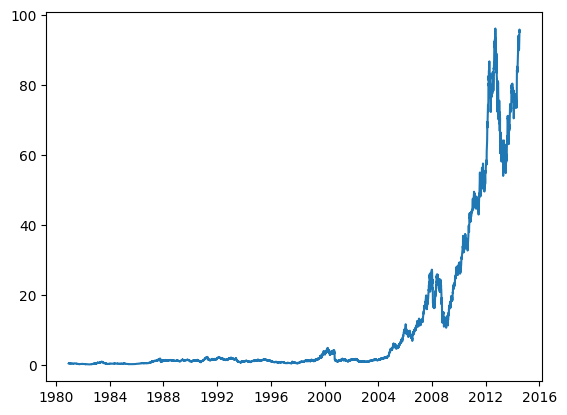

In [67]:
plt.plot(apple['Adj Close']);

In [69]:
apple.loc['1980']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44
1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46
1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48
1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51
